# Linear Regression: Feature Scaling
## Sources: 
1. <a href="https://pythonprogramming.net/training-testing-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Training and Testing</a>
2. <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html" target="_blank">Scikit-learn: Importance of Feature Scaling</a>
3. <a href="https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/" target="_blank"> GeeksforGeeks: Python | How and where to apply Feature Scaling?</a>
4. <a href="https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm" target="_blank">National Heart, Lung, and Blood Institute: Calculate Your Body Mass Index</a>
5. <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5217729/" target="_blank">Curtis A. E., Elefteriades J. A., Smith T.A., Ziganshin B.A. The mystery of the Z-score. AORTA.</a>

In the previous notebook, we learned what linear regression is, and how to begin preparing a dataset for a linear regression machine learning model, by learning about features and labels.  In this notebook, we will import the csv we left off with into a dataframe, and discuss why to scale your features as well as how scaling can be performed.

### NumPy 

We are ready to move on to the actual machine learning part, but before we do, we must import NumPy.   The scikit-learn library is built on NumPy, and therefore works with NumPy arrays.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

# The preprocessing sublibrary from sklearn allows us to scale our data
from sklearn import preprocessing

In [2]:
# Raise errors instead of give warnings
pd.set_option("mode.chained_assignment", "raise")

In [3]:
# Define file path to data,
# and import data into dataframe
import os
data_file_path = os.path.join("data", "stock_data.csv")
stock_data = pd.read_csv(data_file_path)

# Preview dataframe
print(stock_data.head())

   Adj. Close  High_Low_Volatility_Percent  Daily_Percent_Change  Adj. Volume  \
0   50.322842                     8.441017              0.324968   44659000.0   
1   54.322689                     8.537313              7.227007   22834300.0   
2   54.869377                     4.062357             -1.227880   18256100.0   
3   52.597363                     7.753210             -5.726357   15247300.0   
4   53.164113                     3.966115              1.183658    9188600.0   

    Forecast  
0  69.078238  
1  67.839414  
2  68.912727  
3  70.668146  
4  71.219849  


In machine learning, features are generally denoted with an uppercase $X$, and labels are denoted with a lowercase $y$.

In [4]:
# Define X as everything except the Forecast column
X = np.array(stock_data.drop(["Forecast"], 1))

# Define y as the Forecast column
y = np.array(stock_data["Forecast"])

### Feature Scaling

While it is not necessary, you may often want to scale your features before testing your machine learning classifier.  Features may be scaled through standardization, (or Z-score normalization).  This rescales the features such that they have a normal distribution with a mean of zero and a standard deviation of one.<br>
[2]

#### Why scaling is important

Datasets often contains features of varying magnitudes, units, or range.  Algorithms that use Euclidean Distance are sensitive to magnitude, and this could result in misleading the classifier in the training phase of building a machine learning model.<br>
[3]

To better understand this, imagine using age and Body Mass Index (BMI) to predict whether an individual is at risk of having a stroke.  According to the National Heart, Lung, and Blood Institute, typical BMIs usually fall somewhere around the range of 18-30- giving a statistical range of 12.$^{[4]}$  Typical ages on the other hand usually fall somewhere around the range of 0-100- giving a statistical range of 100.

These two measurements- age and BMI- have varying minimums, maximums, and statistical ranges.  Without scaling, the much larger variance of numbers for age could mislead the machine learning classifier into believing that age is more important when predicting whether an individual is at risk of having a stroke.

This may or may not be true.  Maybe age does hold more weight than BMI, and it's not a problem, or maybe age does hold more weight, but not as much as the classifier is led into believing, or maybe age does not hold more weight at all.

In any case, it is often recommended to scale the features before testing the classifier.  Putting the features on a smaller scale could also potentually improve performance time.

To better understand what scaling does, we visualize each Adj. Close price and each Daily Percent Change on the same graph, first with the original data, then with the scaled data.

In [5]:
# Import visualization library
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Create copy of original data
X_original = X.copy(order="C")

# Scale our features
X = preprocessing.scale(X)

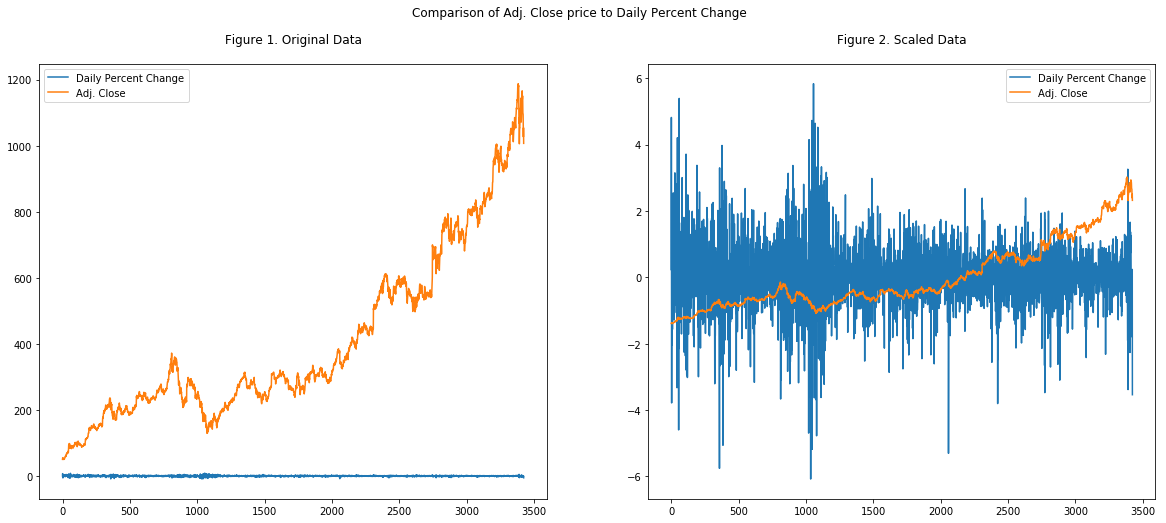

In [7]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,8))
plt.suptitle("Comparison of Adj. Close price to Daily Percent Change\n")

# Plot pre-scaled Adj. Close price and Daily percent change on same graph
plt.subplot(1,2,1)
plt.plot(X_original[:,2], label="Daily Percent Change")
plt.plot(X_original[:,0], label="Adj. Close")
plt.legend()
plt.title("Figure 1. Original Data\n")

# Plot scaled Adj. Close price and Daily percent change on same graph
plt.subplot(1,2,2)
plt.plot(X[:,2], label="Daily Percent Change")
plt.plot(X[:,0], label="Adj. Close")
plt.legend()
plt.title("Figure 2. Scaled Data\n")

plt.show()

As can be seen in Figure 1, without scaling, it appears that Daily Percent Change hardly changes at all.  Using this unscaled data could mislead the classifier into not giving this feature enough weight, though we can see from Figure 2- the scaled data- that this feature has just as much variance as the Adj. Close feature- actually more variance!  Now we will observe the same feature- Adj. Close- both before being scaled and after being scaled- to visually see how variance actually affects the graphical shape of the data.

### Note to the reader:

In the first notebook- 1_Linear_Regression_Features_and_Labels.ipynb- the author of these notebooks used the stock symbol GOOGL.  If you downloaded this notebook for your own use and used a different stock symbol, you should have gotten different images for Figure 1 and Figure 2, and the paragraph above may not have been an accurate description.  Just to be safe, here is an image of the graphs the paragraph above is referring to:<br>

<img src="../Images/googl_adj_close_and_daily_percent_change.png" alt="Adj. Close and Daily Percent Change for GOOGL">

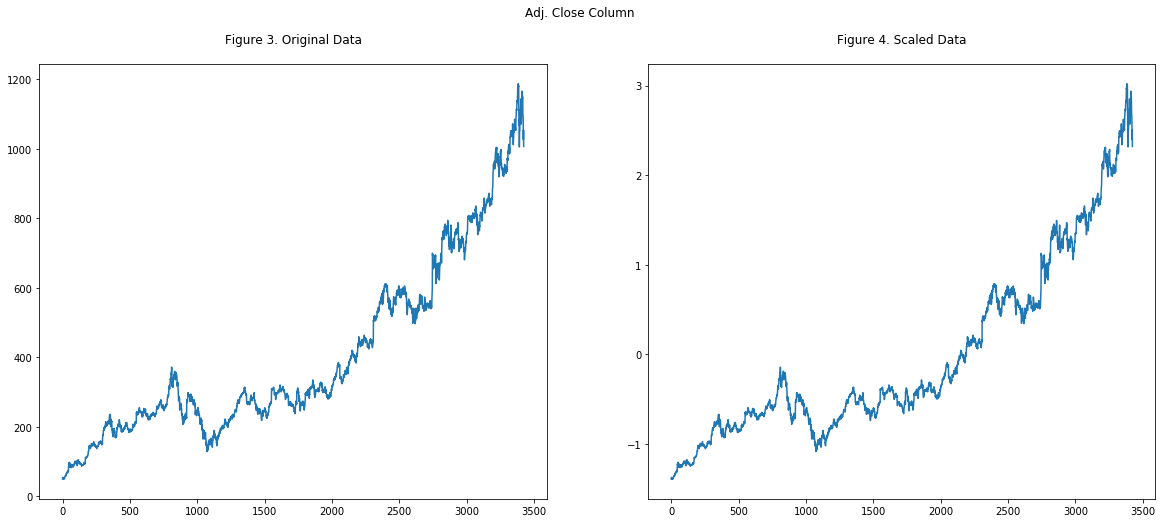

In [8]:
# Create figure for side-by-side comparison
plt.figure(figsize=(20,8))
plt.suptitle("Adj. Close Column")

# Plot Adj. Close column of original data
plt.subplot(1,2,1)
plt.plot(X_original[:,0])
plt.title("Figure 3. Original Data\n")

# Plot Adj. Close column of scaled data
plt.subplot(1,2,2)
plt.plot(X[:,0])
plt.title("Figure 4. Scaled Data\n")

plt.show()

As we can see in Figure 3 and 4, the graphical shape of the data does not change at all!  It is only the scale which has been affected!  This may better be understood by observing the y-axes.  In the original data, there is a statistical range of about 1200; in the scaled data, there is a statistical range of about 3.  When scaling features, the graphical shape thereof does not change.  All that happens, is that the scale is changed such that as many features as possible have as close to the same statistical range as possible.

### Feature Scaling

#### How scaling works

Recalle that the Z-Score tells how many standard deviations a given measurement is away from the mean.  The formula for calculting the Z-Score is

$$
\displaystyle Z = \frac{x - \mu}{\sigma}
$$

where $x$ is the given measurement, $\mu$ is the mean of the data, and $\sigma$ is the standard deviation of the data.

We will look at an example of calculating the Z-Score using the data for this project.

In [9]:
# Get the (pre-scaled) Adj. Close price for the first day
adj_close_price_first_day = X_original[:,0][0]

# Get the mean of the (pre-scaled) Adj. Close prices
adj_close_price_mean = X_original[:,0].mean()

# Get the standard deviation of the (pre-scaled) Adj. Close prices
adj_close_price_standard_deviation = X_original[:,0].std()

# Calculte the Z-Score for the Adj. Close price on the first day
adj_close_price_first_day_Z_Score = (adj_close_price_first_day - adj_close_price_mean) / adj_close_price_standard_deviation

In [10]:
print(f"Adj. Close price on first day: {adj_close_price_first_day}")
print(f"Mean of (pre-scaled) Adj. Close prices: {adj_close_price_mean}")
print(f"Standard Deviation of (pre-scaled) Adj. Close prices: {adj_close_price_standard_deviation}")
print(f"Z-Score of Adj. Close price on first day: {adj_close_price_first_day_Z_Score}")

Adj. Close price on first day: 50.32284179174975
Mean of (pre-scaled) Adj. Close prices: 409.05788478499363
Standard Deviation of (pre-scaled) Adj. Close prices: 257.7358502421395
Z-Score of Adj. Close price on first day: -1.391870951038503


In [11]:
# Print the scaled Adj. Close price for the first day
print(X[:,0][0])

-1.391870951038503


We can see from the work above how the .scale() method actually works.  By using the formula for calculating the Z-Score, we get that

$$
\displaystyle Z = \frac{x-\mu}{\sigma} = \frac{50.32284179174975 - 409.05788478499363}{257.7358502421395} = -1.391870951038503
$$

By checking the first value of our scaled features array, we have confirmed how this value was dervied.  When scaling the features array, the same formula is applied to every value therein to produce an array of each feature's Z-Score.  This scaled array is then what is used when training the classifier, putting each feature on a much more similar scale.

### Note to the reader:

In the first notebook- 1_Linear_Regression_Features_and_Labels.ipynb- the author of these notebooks used the stock symbol GOOGL.  If you downloaded this notebook for your own use and used a different stock symbol, you should have gotten different numbers for these measurements, and the hard-typed formula above will not have the same numbers.  When the author wrote this notebook, these were the numbers calculated for each measurement for GOOGL.